# Dog and Cat Classfier

### Link to Dataset:
https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('Cat_Dog_dataset')
os.listdir()

FileNotFoundError: ignored

In [28]:
# tensorflow libraries/dependencies
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.__version__}")
print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Tensorflow Version: 2.12.0
Number of GPUs Available: 0


In [29]:
pip install visualkeras

## Generating Data

In [30]:
# data directories:
train_dir = '/content/Cat_Dog_dataset/train'
test_dir = '/content/Cat_Dog_dataset/test'

In [31]:
# creating instances of ```ImageDataGenerator``` class
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainDatagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40,
                                  width_shift_range=0.2, height_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
# creating datasets (in form of image generators):
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(64, 64), batch_size=32)

Found 66 files belonging to 3 classes.
Found 17 files belonging to 3 classes.


## Data Visualization

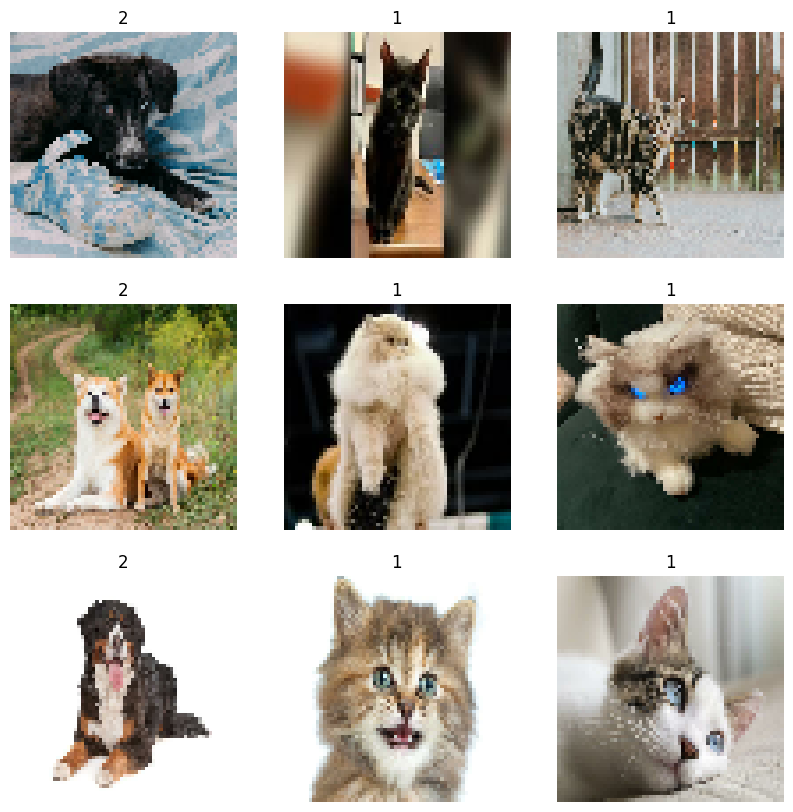

In [33]:
import matplotlib.pyplot as plt

# showing only the first 10 samples of our training data set
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Building Neural Network

In [34]:
# building CNN
model = keras.Sequential([
    # Conv layer 1:
    keras.layers.Conv2D(128, (3, 3), input_shape=(64,64,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Conv layer 2:
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Conv layer 3:
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    keras.layers.Flatten(),

    # fully connected layers:
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units =1, activation = 'sigmoid')

])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics ='accuracy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 batch_normalization_3 (Batc  (None, 62, 62, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 batch_normalization_4 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                      

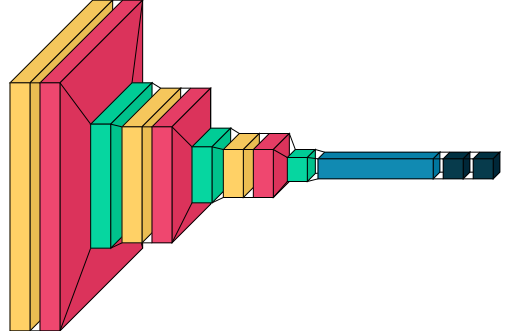

In [35]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
red_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)
logs = model.fit(train_generator, epochs=50, validation_data=test_generator,validation_steps=2000/32, callbacks=[es, red_lr])

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: -2.1952 - accuracy: 0.5000

3/3 [==============================] - 5s 1s/step - loss: -2.1952 - accuracy: 0.5000 - val_loss: -32.8354 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: -11.4685 - accuracy: 0.5303

3/3 [==============================] - 4s 850ms/step - loss: -11.4685 - accuracy: 0.5303 - lr: 0.0010
Epoch 3/50


## Plotting Training curve:

In [ ]:
import matplotlib.pyplot as plt
plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')
# plt.plot(logs.history['val_loss'], label='Validation Loss', linewidth=3)
# plt.plot(logs.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
res = model.evaluate(test_generator)

In [ ]:
accuracy = res[1]
print(accuracy)

Validation accuracy obtained: **67.14%** *(with 3 conv layers and one fully connected layer)*

### Tesing a random image:

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/Cat_Dog_dataset/test/dogs/dog_450.jpg",
    target_size=(64,64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")